### 1. Введение 

Набор данных был загружен из репозитория машинного обучения UCI. Два набора данных относятся к красному и белому вариантам португальского вина «Виньо Верде». Из соображений конфиденциальности и логистики доступны только физико-химические (входные) и сенсорные (выходные) переменные (например, отсутствуют данные о сортах винограда, марке вина, отпускной цене вина и т. д.). Эти наборы данных можно рассматривать как задачи классификации или регрессии. Классы упорядочены и не сбалансированы (например, нормальных вин намного больше, чем отличных или плохих). Алгоритмы обнаружения выбросов можно использовать для обнаружения нескольких отличных или плохих вин. Кроме того, мы не уверены, все ли входные переменные актуальны. Поэтому было бы интересно протестировать методы выбора функций. Два набора данных были объединены, и несколько значений были удалены случайным образом.

### 2. Описание данных и признаков 

Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10)

### 3. Импорт необходимых библиотек Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

import tensorflow as tf
from tensorflow.keras.regularizers import l2

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, ConfusionMatrixDisplay

### 4. Импорт набора данных 

In [2]:
url = 'https://www.kaggle.com/datasets/rajyellow46/wine-quality/download?datasetVersionNumber=1'
response = requests.get(url)

if response.status_code == 200:
    with open("winequalityN.csv", "wb") as file:
        file.write(response.content)
    print("Файл успешно скачан.")
else:
    print("Не удалось скачать файл. Статус код:", response.status_code)

Файл успешно скачан.


### 5. Исследовательский анализ данных 

In [3]:
data = pd.read_csv('winequalityN.csv')
df = data.copy()
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.shape

(6497, 13)

In [5]:
df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [6]:
df.dropna(inplace=True)
df.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
df.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [8]:
df['type'] = df['type'].astype("category").cat.codes

In [9]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [10]:
df.describe()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,0.753520,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825,5.818505
std,0.430995,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128,0.873286
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,1.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000,5.000000
50%,1.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,1.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,1.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [11]:
X = df.drop("type",axis=1)
y = df['type']

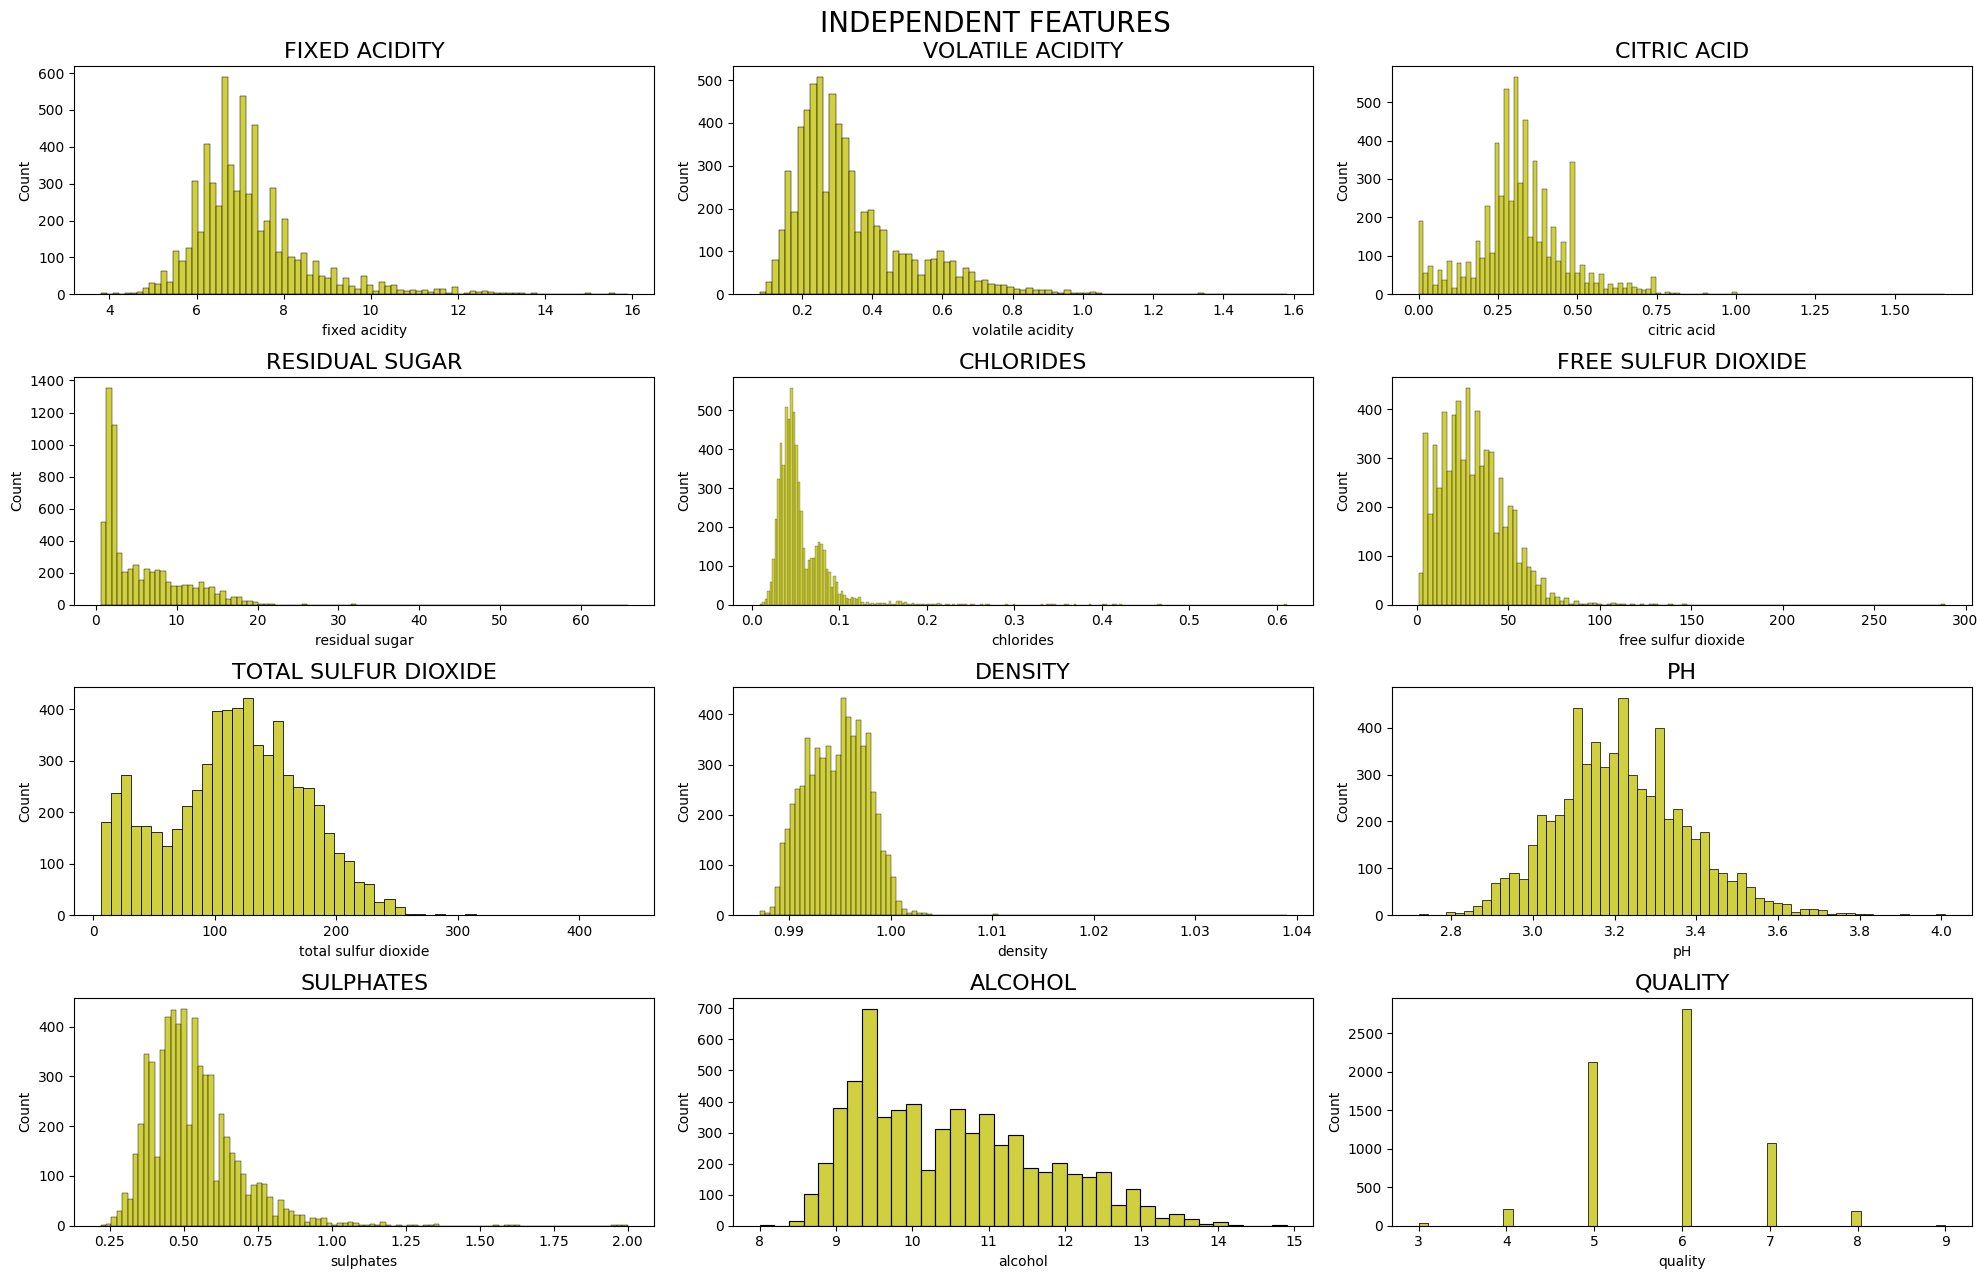

In [12]:
fig, axes = plt.subplots(4, 3, figsize=(20,13))
fig.suptitle('Independent Features'.upper(), fontsize=20)
feat = X.columns
f = 0
for i in range(4):
    for j in range(3):
        sns.histplot(data = df,x= feat[f],ax=axes[i,j],color="y")
        axes[i,j].set_title(feat[f].upper(),fontsize=16)
        f += 1
fig.tight_layout()

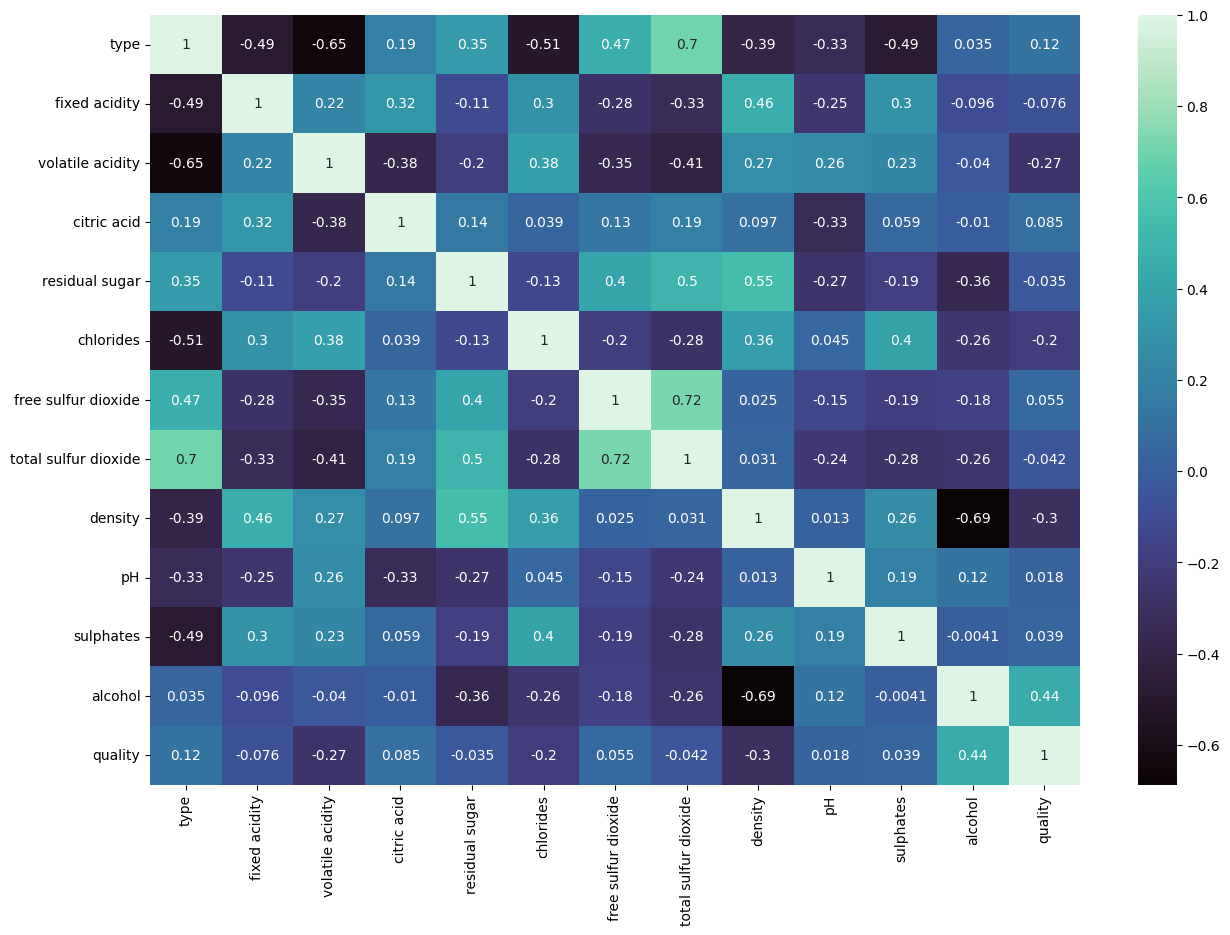

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True, cmap='mako')
plt.show()

### 6. Разбиение данных на обучающие и тестовые наборы

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X.values,y.values,test_size=0.25,random_state=123)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(4847, 12) (1616, 12) (4847,) (1616,)


In [15]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### 7. Построение модели

In [16]:
rf = RandomForestClassifier(n_estimators=10, criterion="entropy",random_state=0)

In [17]:
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

### 8. Тестирование и оценка 

In [18]:
y_pred = rf.predict(X_test)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       403
           1       1.00      1.00      1.00      1213

    accuracy                           1.00      1616
   macro avg       0.99      0.99      0.99      1616
weighted avg       1.00      1.00      1.00      1616



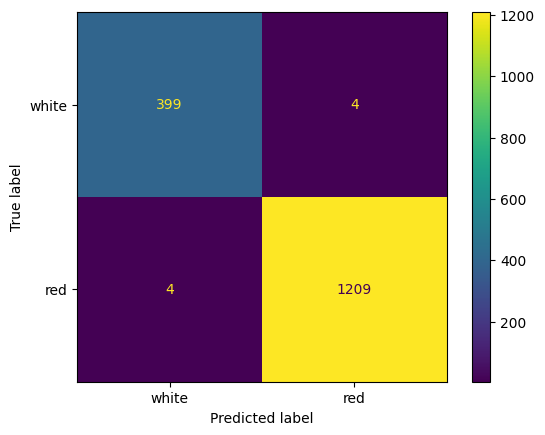

In [19]:
cm = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cm,display_labels=["white","red"])
cmd.plot()
print("Classification Report:\n",classification_report(y_test,y_pred))
plt.show()

In [20]:
print("Accuracy Score:", accuracy_score(y_test,y_pred))

Accuracy Score: 0.995049504950495
